<a href="https://colab.research.google.com/github/YousefAbua/Intro-To-ML/blob/main/Homework4/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
# Access Housing Dataset
file_path = '/content/drive/My Drive/Intro to ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [149]:
# Paramters that are strings
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

# Parameters for part Q1_a and Q1_b
varlist1 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

# Binary map to convery strings to numerical values in chart
def binary_map(x):
  return x.map({'yes' : 1, 'no' : 0})

# Applying binary map
housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [150]:
housing.pop('furnishingstatus')

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

scaler = MinMaxScaler()
housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

y = housing.pop('price')
x = housing.values

# Training Set/Testing Set split (80/20)
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x,  y, train_size = 0.8)

k_val = range(1,12)

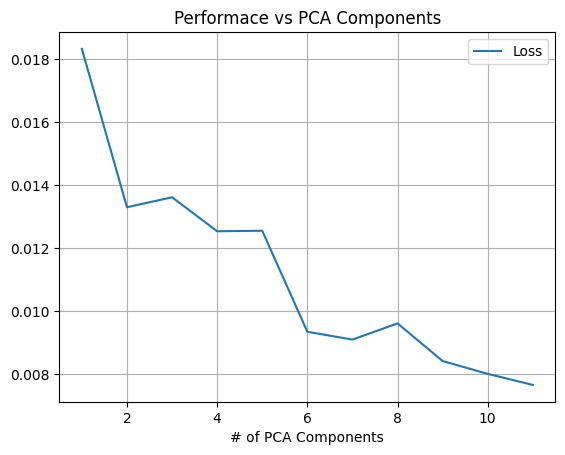

In [151]:
loss = []

# Find optimum K *LINEAR*
for K in k_val:
  # Perform PCA
  pca = PCA(n_components = K)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)
  model = SVR(kernel = 'linear', C = 1)
  model.fit(x_train_pca, y_train)
  pred = model.predict(x_test_pca)
  loss.append(metrics.mean_squared_error(y_test, pred, squared=True))

plt.plot(k_val, loss, label = "Loss")

plt.title("Performace vs PCA Components")
plt.xlabel("# of PCA Components")
plt.grid(True)
plt.legend()